# Part 1:
## Data Gathering
### Section 1: importing libraries

In [1]:
import requests #to download the file programmatically.
import os # might be needed during to download the file programmatically
import csv # might be needed to deal with CSV files
import glob # might be needed to deal with the text files recived from the API
import pandas as pd #Needed for the wrangiling & analyzing processes
import numpy as np #might be needed in analyzing & visualizing processes
import matplotlib.pyplot as plt #Needed for visualization
import seaborn as sns #Needed for visualization
import tweepy #To download text file as the third source of data

### Section 2: importing the data
#### Downloading CSV file 

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head();

**Visual observations to be moved to the assessing part later:**
- There are missing data
- Rating denominator might get removed since it is the same across all rows.

----------------------------------------------------

#### Downloading second file programmatically

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
image_predictions = response.content
tsv_file = open('downloaded.tsv', 'wb')
tsv_file.write(image_predictions)
tsv_file.close()

In [3]:
df2 = pd.read_csv('downloaded.tsv',delimiter='\t')
df2.head();

**Visual observations to be moved to the assessing part later:**
- Column name are not describtive
- Minor observation: not all dogs breed starts with capital letter (can be ignored)

--------------------------------------------------------------

#### Downloading third file from twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [50]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(id=tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 735
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Succe

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [4]:
import re
d_id = []
retweet = []
favorite = []
with open('tweet_json.txt') as f:
    for line in f:
        result1 = re.findall(r'"id": (\d*)', line)
        result2 = re.findall(r'"retweet_count": (\d*)', line)
        result3 = re.findall(r'"favorite_count": (\d*)', line)
        d_id.append(int(result1[0]))
        retweet.append(int(result2[0]))
        favorite.append(int(result3[0]))

In [5]:
#Creating dictionary from the three list made above.
# the dictionary will be converted to DataFrame
d = {'tweet_id': d_id, 'retweet_count': retweet, 'favorite_count': favorite}
df3 = pd.DataFrame(d)
print(df3.shape)
df3.head();

(2330, 3)


--------------------------------------------------
--------------------------------------------------

# Part 2:
## Data Assessing

The assessment process for all dataframes will be:
- Using .Info method to get genral information
- Using .isnull().sum() methods to check for missing values
- Using .sample to check random samples and apply visual assessment
- Using .describe to get statistical information about the data
- Chicking for tidiness

### Section 1: Assessing First Data Frame

In [7]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df1.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1429,697596423848730625,NaN,NaN,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


Assessig Remarks:
- The values under timestamp column is object instead of being time type.
- Having None value under the following columns (doggo, floofer, pupper, puppo) instead of NaN
- Dogs stage are divided over 4 columns instead of having it under one column. This is tidiness issue.
- Large numbers of missing values for the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp)
- There is a rating of zero for nomerator are less than the denominator. It can be sign of qulaity issue. 
- There is a rating of zeroor less than 10 for the denominator which needs to be checked.
- The type of data under the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp) are float which is not correct


-----------------------------------------------------------------------------

### Section 2: Assessing Second Data Frame

In [12]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df2.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1356,760539183865880579,https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg,1,Samoyed,0.988013,True,malamute,0.004518,True,West_Highland_white_terrier,0.001189,True
180,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True


Assessig Remarks:
- The main issue here is tidness. The last 9 columns can be replaced with either 1 columns (if we decided to accept the dog breed with the highest confident value & the if the prediction is True or not) or 3 columns. This will be decided in the cleaning process.
- The columns names are not descriptive which is another tidness issue.
- Minor quality issue: the name of the breed doesn't start with capital for all dogs
- Some values mentioned under columns (p1, p2, and p3) are not valid. e.g. for row# 1270 it predicts the dog as bow_tie, and sunglasses which doesn't make any sense

-----------------------------

### Section 3: Assessing Third Data Frame

In [17]:
df3.head()

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,7272,34744
1,892177421306343426,5441,30115
2,891815181378084864,3585,22665
3,891689557279858688,7472,38029
4,891327558926688256,8027,36305


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
tweet_ID          2330 non-null int64
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [19]:
df3.isnull().sum()

tweet_ID          0
retweet_count     0
favorite_count    0
dtype: int64

Assessig Remarks:
- The only remark that can be highlited here is that this data frame can part of the second data frame

----------------------

**Summary of all quality and tidiness issues found across the three data frames:**<br>
- Date frame 1:
    - Quality:
        - The values under timestamp column is object instead of being time type.
        - Having None value under the following columns (doggo, floofer, pupper, puppo) instead of NaN
        - Large numbers of missing values for the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp)
        - There is a rating of zero for nomerator are less than the denominator. It can be sign of qulaity issue. 
        - There is a rating of zeroor less than 10 for the denominator which needs to be checked.
        - The type of data under the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp) are float which is not correct
    - Tidiness:
        - Dogs stage are divided over 4 columns instead of having it under one column. This is tidiness issue.
- Data frame 2:
    - Quality:
        - Minor quality issue: the name of the breed doesn't start with capital for all dogs
        - Some values mentioned under columns (p1, p2, and p3) are not valid. e.g. for row# 1270 it predicts the dog as bow_tie, and sunglasses which doesn't make any sense
    - Tidiness:
        - The main issue here is tidness. The last 9 columns can be replaced with either 1 columns (if we decided to accept the dog breed with the highest confident value & the if the prediction is True or not) or 3 columns. This will be decided in the cleaning process.
        - The columns names are not descriptive which is another tidness issue.
<br>
- Data frame 3:
    - Tidiness:
        - The only remark that can be highlited here is that this data frame can be integrated with the other two data frames.
    

--------------------------------------------------------
--------------------------------------------------------

# Part 3:
## Data Cleaning

**For the cleaning process I will go through each issue stated in the assessment part and propuse a solution or cleaning method. Some will have the same solution**

### Section 1: Cleaning First Data Frame

#### Defining the solution for each problem
- The values under timestamp column is object instead of being time type.
    - Solution: Changing the type of the data

- Having None value under the following columns (doggo, floofer, pupper, puppo) instead of NaN.
    - Solution: Replacing any None value with NaN, then check for the number of missing values.

- Large numbers of missing values for the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp).
    - Solution: since more than 90% of the values under those columns are missing, they can be deleted. Moreover, it won't be needed.

- There is a rating of zero for nomerator are less than the denominator. It can be sign of qulaity issue. 
    - Solution: Check of those rows

- There is a rating of zeroor less than 10 for the denominator which needs to be checked.
    - Solution: Check of those rows

- The type of data under the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweeted_status_timestamp) are float which is not correct
    - Solution: since more than 90% of the values under those columns are missing, they can be deleted. Moreover, it won't be needed.
    
- Dogs stage are divided over 4 columns instead of having it under one column. This is tidiness issue.
    - Solution: the four columns are going to be merged under one

In [14]:
#first make a copy of the original data set
df1_clean = df1.copy()

#### Coding and testing each solution

In [15]:
# convert the 'Date' column to datetime format (coding)
df1_clean['timestamp']= pd.to_datetime(df1_clean['timestamp'])
 
# Check the format of 'Date' column (testing)
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [16]:
# Coding the solution of missing values and tidiness all at once

# First replace None in stage columns with empty string as follows.
df1_clean.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
df1_clean['stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [17]:
df1_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
stage                            0
dtype: int64

In [18]:
# Removing the columns with high number of NaN values (Coding)
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer','pupper','puppo'], axis = 1)
# Tesing the code
df1_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


In [19]:
df1_num = df1_clean[df1_clean['rating_numerator'] <= 10]
df1_num

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,
113,870726314365509632,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,
165,860177593139703809,2017-05-04 17:01:34,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,
212,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,
229,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,
232,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,
274,840698636975636481,2017-03-11 22:59:09,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,10,10,None,
275,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,
281,839290600511926273,2017-03-08 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,https://twitter.com/alexmartindawg/status/8392...,10,10,None,pupper
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,


###### From above it can be noticed that many of the dogs that recieve ratings equal or below 10 are random dogs

#### We can also check for the NaN values under "expanded_urls" columns to check if it is related to rating_numerator with ratings lower that 10

In [20]:
df1_clean[df1_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
30,886267009285017600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,
55,881633300179243008,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,
64,879674319642796034,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,
113,870726314365509632,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,
148,863427515083354112,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,
179,857214891891077121,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,None,
185,856330835276025856,2017-04-24 02:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,NaN,14,10,None,
186,856288084350160898,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,


**It can be seen from the above reults that all rows that have NaN value for 'expanded_urls' columns have no dogs names. Some of them also don't have accurate rating. Those tweets might have been deleted. Hence, those rows can be removed**

In [21]:
df1_clean.dropna(subset = ["expanded_urls"], inplace=True)

In [22]:
df1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
stage                 0
dtype: int64

**By this we took out ratings that have no reference**

**To re-check the rows with rating_numerator that are less than 10**

In [23]:
df1_num = df1_clean[df1_clean['rating_numerator'] <= 10]
df1_num

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,
165,860177593139703809,2017-05-04 17:01:34,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,
212,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,
229,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,
232,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,
275,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,
281,839290600511926273,2017-03-08 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,https://twitter.com/alexmartindawg/status/8392...,10,10,None,pupper
315,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,
323,834089966724603904,2017-02-21 17:18:39,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo
335,832645525019123713,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,


**From above it can be seen that there are multiple rows RT@ which are not an original tweets. Those have to be removed, and after it I will check for numerator and denominator ratings** 

In [24]:
# Codding to remove retweets
df1_clean = df1_clean[~df1_clean.text.str.contains("RT @")]

In [25]:
# Testing to check if the texts with RT @ are removed or not by having the below exceprtion which will return True if the
# spacified string exist
sum(df1_clean['text'].str.contains("RT @") == True)

0

### From the cleaning process for data frame one, the following was done:
- All columns that have the majority of its values missing are removed.
- The type for the [timestamp] columns was corrected to be date type.
- Any row with missing URL was deleted as it is considered lack of source.
- Rows with texts that have rtweets are removed.
- Created one column for dog stages substituting the four column
<br>
*The final version of the data frame is now called df1_clean*

----------------------------------------------------------

### Section 2: Cleaning Second Data Frame

#### Defining the solutions
- The main issue here is tidness. The last 9 columns can be replaced with either 1 columns (if we decided to accept the dog breed with the highest confident value & the if the prediction is True or not) or 3 columns. This will be decided in the cleaning process.
    - Solution: First remove unvalid data. Then choose the prediction with highst confident value as the only columns
- Minor quality issue: the name of the breed doesn't start with capital for all dogs
    - No need to be fixed.
- Some values mentioned under columns (p1, p2, and p3) are not valid. e.g. for row# 1270 it predicts the dog as bow_tie, and sunglasses which doesn't make any sense
    - Solution: Remove unvalid values
- The columns names are not descriptive which is another tidness issue.
    - Solution: Change the names of the columns

In [26]:
df2_clean = df2.copy()

#### Coding and testing each solution

In [27]:
df2_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [28]:
dfA = df2_clean[df2_clean['p1_dog'] == False]

In [29]:
dfB = dfA[dfA['p2_dog'] == False]

In [30]:
dfC = dfB[dfB['p3_dog'] == False]

In [31]:
dfC;

**From the above result we can see that there are 324 dogs that were totaly miss-identified. Those rows need to be removed**

In [32]:
# Coding the solution to remove the rows that have all their prediction wrong
df2_clean = pd.concat([df2_clean, dfC]).drop_duplicates(keep=False)

In [33]:
# Testing that the code worked by having the number of removed columns subtracted from the orginal data set
df2_clean.shape[0] == df2.shape[0]  - dfC.shape[0]

True

In [34]:
df2_clean.rename(columns = {'p1': 'Prediction_1', 'p2': 'Prediction_2', 'p3': 'Prediction_3',
                             'p1_conf': 'P1_ConfidanceScore', 'p2_conf': 'P2_ConfidanceScore', 'p3_conf': 'P3_ConfidanceScore',
                             'p1_dog': 'P1_Correct', 'p2_dog': 'P2_Correct', 'p3_dog': 'P3_Correct'}, inplace = True)


In [35]:
df2_clean.head()

,tweet_id,jpg_url,img_num,Prediction_1,P1_ConfidanceScore,P1_Correct,Prediction_2,P2_ConfidanceScore,P2_Correct,Prediction_3,P3_ConfidanceScore,P3_Correct
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Now will remove the wrong false prediction from each row without deleting the whole row. Then having one column containing the dog breed for all true predictions**<br>
*coding*

In [36]:
for v1, v2 in zip(df2_clean['Prediction_1'], df2_clean['P1_Correct']):
    if v2 == False:
        df2_clean["Prediction_1"].replace({v1: ' '}, inplace=True)

In [37]:
for v1, v2 in zip(df2_clean['Prediction_2'], df2_clean['P2_Correct']):
    if v2 == False:
        df2_clean["Prediction_2"].replace({v1: ' '}, inplace=True)

In [38]:
for v1, v2 in zip(df2_clean['Prediction_3'], df2_clean['P3_Correct']):
    if v2 == False:
        df2_clean["Prediction_3"].replace({v1: ' '}, inplace=True)

In [39]:
df2_clean['dog_breed'] = df2_clean['Prediction_1'] + ',' + df2_clean['Prediction_2'] + ',' + df2_clean['Prediction_3']

In [40]:
# Testing the function worked
df2_clean.head()

,tweet_id,jpg_url,img_num,Prediction_1,P1_ConfidanceScore,P1_Correct,Prediction_2,P2_ConfidanceScore,P2_Correct,Prediction_3,P3_ConfidanceScore,P3_Correct,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,"Welsh_springer_spaniel,collie,Shetland_sheepdog"
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,"redbone,miniature_pinscher,Rhodesian_ridgeback"
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,"German_shepherd,malinois,bloodhound"
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,"Rhodesian_ridgeback,redbone,miniature_pinscher"
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,"miniature_pinscher,Rottweiler,Doberman"


**Dog_breed column shows mix of the breed of the dog which could mix of different breeds. The following columns can be dropped [rediction_1, P1_ConfidanceScore, P1_Correct,Prediction_2, P2_ConfidanceScore, P2_Correct, Prediction_3, P3_ConfidanceScore, P3_Correct]**

In [41]:
df2_clean.drop(columns=['Prediction_1', 'P1_ConfidanceScore', 'P1_Correct',
                        'Prediction_2', 'P2_ConfidanceScore', 'P2_Correct', 'Prediction_3',
                        'P3_ConfidanceScore', 'P3_Correct'], axis = 1, inplace=True)

In [42]:
df2_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh_springer_spaniel,collie,Shetland_sheepdog"
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,"redbone,miniature_pinscher,Rhodesian_ridgeback"
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German_shepherd,malinois,bloodhound"
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"Rhodesian_ridgeback,redbone,miniature_pinscher"
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"miniature_pinscher,Rottweiler,Doberman"


### From the cleaning process for data frame one, the following was done:
- All False predictions has been removed.
- New column made the shows the breed of the dogs.<br>
*The final version of the data frame is now called df2_clean*

-----------------------

### Section 3: Cleaning Third Data Frame
- Tidiness:The only remark that can be highlited here is that this data frame can be integrated with the other two of data frames.
    - Solution: merge the last dataframe with the other two data frames.

In [49]:
df3_copy = df3.copy()

In [50]:
df3_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7272,34744
1,892177421306343426,5441,30115
2,891815181378084864,3585,22665
3,891689557279858688,7472,38029
4,891327558926688256,8027,36305


**Below df3 & df2_final will be merged into one dataframe**

In [51]:
df_merged = pd.merge(df2_clean, df3_copy, on=['tweet_id'], how='left')

In [52]:
df_merged.head(1)

,tweet_id,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh_springer_spaniel,collie,Shetland_sheepdog",440.0,2333.0


In [53]:
df_merged.shape

(1751, 6)

In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 6 columns):
tweet_id          1751 non-null int64
jpg_url           1751 non-null object
img_num           1751 non-null int64
dog_breed         1751 non-null object
retweet_count     1737 non-null float64
favorite_count    1737 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 95.8+ KB


In [55]:
twitter_archive_master = pd.merge(df1_clean, df_merged, on=['tweet_id'], how='left')

In [68]:
twitter_archive_master['dog_breed'] = twitter_archive_master['dog_breed'].replace(np.nan, ' ')

In [69]:
twitter_archive_master.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
stage                 2117 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
dog_breed             2117 non-null object
retweet_count         1679 non-null float64
favorite_count        1679 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 248.1+ KB


--------

### Summary of the cleaning section:
- First Dataframe:
    - All columns that have the majority of its values missing are removed.
    - The type for the [timestamp] columns was corrected to be date type.
    - Any row with missing URL was deleted as it is considered lack of source.
    - There are some rows that have a numerator very large or less than 10, which seems to be okay
    - All rows with rating_denominator not equal to 10 was dropped.
- Second Dataframe:
    - All False predictions has been removed.
    - New column made the shows the breed of the dogs.
    - The third dataframe is merged with the second one.
- Third Datafram:
    - Was merged with the other two and created one master data frame

----------------------------------
----------------------------

# Part 3:
## Data Storing
### All the cleaned data are going to be combined in one CSV file

In [63]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False);

----------------------------------------

# Part 4:
## Data Visualization and Analysis
##### In this seciton that data will be visualized first using word cloud to find the most common dog breed. The analysis will start from that point.

### Section 1: Data Visualization

In [64]:
from wordcloud import WordCloud, STOPWORDS

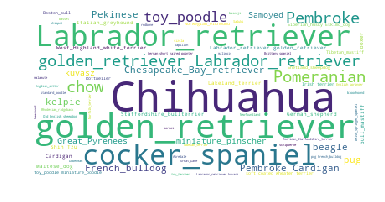

In [70]:
wordcloud = WordCloud(background_color='white',max_font_size = 50).generate(' '.join(twitter_archive_master['dog_breed']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

-------------

### Section 2: Data Analysis

**Here only basic insights are provided**<br>
- The first insight: it can be seen from the generated word cloud that the most common breeds of dogs are: Chihuahua, Labrador retriever, and the golden retriever.

**Starting from the above observation, let us check which type has the highest retweets counts & favorite counts**

In [64]:
Chihuahua = df_merged[df_merged['dog_breed'].str.contains("Chihuahua")]

In [65]:
total_retweets_Chihuahua = Chihuahua.retweet_count.sum()
total_likes_Chihuahua = Chihuahua.favorite_count.sum()
print('The number of retweets for Chihuahua dogs are {} and the number of likes are {}'.format(total_retweets_Chihuahua, total_likes_Chihuahua))

The number of retweets for Chihuahua dogs are 422798.0 and the number of likes are 1437109.0


In [66]:
Labrador = df_merged[df_merged['dog_breed'].str.contains("Labrador_retriever")]
golden = df_merged[df_merged['dog_breed'].str.contains("golden_retriever")]

total_retweets_Labrador = Labrador.retweet_count.sum()
total_likes_Labrador = Labrador.favorite_count.sum()

total_retweets_golden = golden.retweet_count.sum()
total_likes_golden = golden.favorite_count.sum()

print('The number of retweets for Labrador retriver dogs are {} and the number of likes are {}'.format(total_retweets_Labrador, total_likes_Labrador))
print('The number of retweets for golden_retriver dogs are {} and the number of likes are {}'.format(total_retweets_golden, total_likes_golden))

The number of retweets for Labrador retriver dogs are 925977.0 and the number of likes are 3234187.0
The number of retweets for golden_retriver dogs are 878525.0 and the number of likes are 2986730.0


- **The second observation is that the Labrador has the highest retweets and likes, the golden retriever comes second, and the Chihuahua comes last in both retweets and likes.**

*I will combine the dog breed column from df_merged with df1_final check the highest rating for each type of the three dogs*

In [67]:
df_dogbreed = df_merged[['tweet_id', 'dog_breed']]

In [68]:
dogbreed_rating = pd.merge(df1_final, df_dogbreed, on=['tweet_id'], how='left')

In [69]:
dogbreed_rating.dropna(axis=0, inplace = True)

In [70]:
Chihuahua_rating = dogbreed_rating[dogbreed_rating['dog_breed'].str.contains("Chihuahua")]

In [71]:
Labrador_rating = dogbreed_rating[dogbreed_rating['dog_breed'].str.contains("Labrador_retriever")]
golden_rating = dogbreed_rating[dogbreed_rating['dog_breed'].str.contains("golden_retriever")]

In [72]:
Chihuahua_rating.rating_numerator.mean()

10.655737704918034

In [73]:
Labrador_rating.rating_numerator.mean()

11.348920863309353

In [74]:
golden_rating.rating_numerator.mean()

11.477031802120141

- **The final observation is that the average rating for golden retriever is the highest which is 11.5, Labrador comes second with average rating of 11.3, and the Chihuahua comes last with rating of 10.7**

----------------------------

### Summary of the visualization and analysis section:
- The first insight: it can be seen from the generated word cloud that the most common breeds of dogs are: Chihuahua, Labrador retriever, and the golden retriever.
- The second observation is that the Labrador has the highest retweets and likes, the golden retriever comes second, and the Chihuahua comes last in both retweets and likes.
- The final observation is that the average rating for golden retriever is the highest which is 11.5, Labrador comes second with average rating of 11.3, and the Chihuahua comes last with rating of 10.7